# WeatherPy

In [332]:
# import libraries to be used 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st 
import numpy as np 
from scipy.stats import linregress 
import json
from config import api_key
import requests
import pprint

# assign variables to city data csv filepath
city_data_loc="Cities by Lat Long Final CSV.csv"

# read data csv file into Pandas
city_data=pd.read_csv(city_data_loc)

# output the resulting dataframe to console/terminal
city_data

,City,Country,Code,Hemisphere,Latitude,Longitude
0,Adak,United States,US,Northern,50,-175
1,Honolulu,United States,US,Northern,20,-160
2,Barrow,United States,US,Northern,70,-155
3,Hilo,United States,US,Northern,20,-155
4,Anchorage,United States,US,Northern,60,-150
...,...,...,...,...,...,...
927,Hamilton,New Zealand,NZ,Southern,-40,175
928,Hastings,New Zealand,NZ,Southern,-40,175
929,Suva,Fiji,FJ,Southern,-20,180
930,Funafuti,Tuvalu,TV,Southern,-10,180


In [287]:
# Establish variables for the url to be used for retrieving data from the site (incliuding base url, the API key, and parameter to ensure temperature data retrieved is in degrees fahreneheit)
base_url="http://api.openweathermap.org/data/2.5/weather?"
api="appid=" + api_key
uni="&units=imperial"

In [288]:
# Create Lists from columns in the dataframe to be used for API calls
city_list=city_data["City"].to_list()
country_list=city_data["Country"].to_list()
code_list=city_data["Code"].to_list()
hemi_list=city_data["Hemisphere"].to_list()
lat_list=city_data["Latitude"].to_list()
lon_list=city_data["Longitude"].to_list()

In [289]:
# Create empty lists to hold the weather data retrieved in the API calls
temp_list=[]
humid_list=[]
cloud_list=[]
wind_list=[]


In [294]:
# Establsh a loop to make the API calls  

# iterate through the length of the list of cities, read city and country code, attch city to call variable and print a message indicating which city is currently processing to terminal/ console 
for i in range(len(city_list)):
    city=city_list[i]
    cc=code_list[i]
    cityq="&q="+city
    print(f"City {i}: {city} is processing",end="\r")

# Establish the complete call url by attaching city of interest to the prior url variables and make the call API calls and return the data in json format
    url=base_url+api+uni+cityq
    response=requests.get(url).json()
    
# Append the retrieved data from the site based on specific fields to the empty weather variables prveiously established
    temp_list.append(response["main"]["temp"])
    humid_list.append(response["main"]["humidity"])
    cloud_list.append(response["wind"]["speed"])
    wind_list.append(response["clouds"]["all"])

In [312]:
# Create a copy of the city data dataframe to be used for charting
city_chart=city_data.copy()

In [313]:
# Add columns to the new dataframe that include the weather data retrieved from the API calls to the site
city_chart["Temperature"]=temp_list
city_chart["Humidity"]=humid_list
city_chart["Cloudiness"]=cloud_list
city_chart["Wind_Speed"]=wind_list

In [316]:
# Output the resulting combined city and weather dataframe to a csv file stored in the same directory as the notebook file
city_chart
city_chart_csv=city_chart.to_csv("worldcity_data.csv", index=True)

In [323]:
# Create new dataframes from the new weather dataframe that segregate the data into Northern and Southern hemispheres
north_city=city_chart[city_chart["Hemisphere"]=="Northern"]
south_city=city_chart[city_chart["Hemisphere"]=="Southern"]

## Scatter Plots of Data

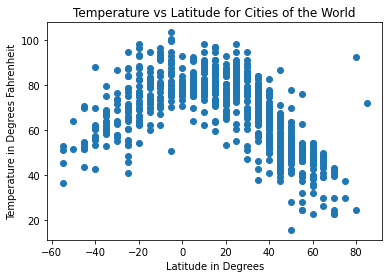

In [319]:
# Temperature vs Latitude Scatter plot

# Establish X and Y data for the plot using appropriate fields from the dataframe
x_val=city_chart["Latitude"]
y_val=city_chart["Temperature"]

# Plot the chart, add labels, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.xlabel("Latitude in Degrees")
plt.ylabel("Temperature in Degrees Fahrenheit")
plt.title("Temperature vs Latitude for Cities of the World")
plt.savefig("TempLat_Scatter.png", dpi=300)
plt.show()

### Observations - Temperature vs Latitude

1.  The temperatures show a defined distribution around the equator where the temperatures are the highest and decrease evenly further away
2.  As with all of the charts to follow, the distribution of population in northern vs southern hemispheres is seen in the length of the curve tails in which the positive latitude numbers from the northern hemisphere show more data points and a longer tail 

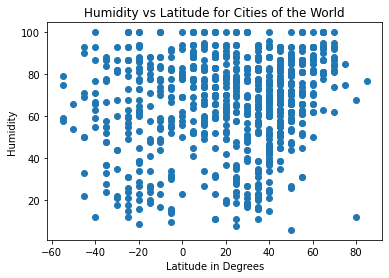

In [320]:
# Humidity vs Latitude

# Establish X and Y data for the plot using appropriate fields from the dataframe
x_val=city_chart["Latitude"]
y_val=city_chart["Humidity"]

# Plot the chart, add labels, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.xlabel("Latitude in Degrees")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude for Cities of the World")
plt.savefig("HumidLat_Scatter.png", dpi=300)
plt.show()

### Observations - Humidity vs Latitude

1.  The chart indicates the world population densities  - highest numbers are concentrated in area north of equator
2.  The chart seems to indicate that the range of humidity levels tends toward higher humidity awy from 20 to 40 degrees, though the data is slightly distorted by fewer readings from less populated areas, it does show that the humidity is consistenly higher around the equator and colder areas of northern america, europe, and asia

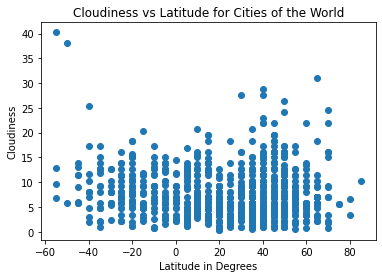

In [321]:
# Cloudiness vs Latitude

# Establish X and Y data for the plot using appropriate fields from the dataframe
x_val=city_chart["Latitude"]
y_val=city_chart["Cloudiness"]

# Plot the chart, add labels, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.xlabel("Latitude in Degrees")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude for Cities of the World")
plt.savefig("CloudLat_Scatter.png", dpi=300)
plt.show()

### Observations - Cloudiness vs Latitude

1.  The chart clearly indicates no relationship between cloudiness and latitude as the values are consistent across the range of geographies

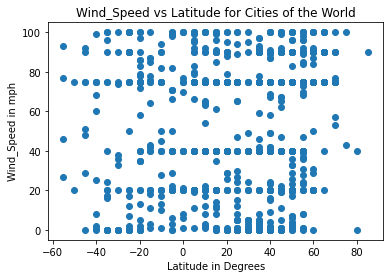

In [322]:
# Cloudiness vs Latitude

# Establish X and Y data for the plot using appropriate fields from the dataframe
x_val=city_chart["Latitude"]
y_val=city_chart["Wind_Speed"]

# Plot the chart, add labels, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.xlabel("Latitude in Degrees")
plt.ylabel("Wind_Speed in mph")
plt.title("Wind_Speed vs Latitude for Cities of the World")
plt.savefig("WindLat_Scatter.png", dpi=300)
plt.show()

### Observations - Wind Speed vs Latitude

1.  The chart idictaes no relationship betwwen wind speed and latitude.
2.  An interesting note of the chart is that the data seems to indicate that wind speeds in most all areas are either very high or quite mild and the middle levels between 20 - 75 mph (which is quite high) are not plentiful

## Linear Regressions

In [324]:
north_city

,City,Country,Code,Hemisphere,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Adak,United States,US,Northern,50,-175,41.00,93,6.93,75
1,Honolulu,United States,US,Northern,20,-160,75.52,88,10.85,40
2,Barrow,United States,US,Northern,70,-155,24.80,62,16.11,90
3,Hilo,United States,US,Northern,20,-155,64.87,56,5.82,75
4,Anchorage,United States,US,Northern,60,-150,38.61,82,0.76,90
...,...,...,...,...,...,...,...,...,...,...
730,Palikir,Federated States of Micronesia,FO,Northern,5,160,75.20,100,8.77,20
731,Petropavlovsk-Kamchatsky,Russia,RO,Northern,55,160,28.40,63,6.71,0
732,Majuro,Marshall Islands,MH,Northern,5,170,82.40,78,12.75,90
733,South Tarawa,Kiribati,KI,Northern,0,175,80.60,69,6.93,20


In [325]:
south_city

,City,Country,Code,Hemisphere,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
735,Mata-Utu,France,FR,Southern,-15,-175,80.82,80,20.31,18
736,Apia,Samoa,WS,Southern,-15,-170,75.20,88,5.82,20
737,Pago Pago,United States,US,Southern,-15,-170,78.80,88,11.41,75
738,Alofi,New Zealand,NZ,Southern,-20,-170,71.60,100,12.75,58
739,Avarua,New Zealand,NZ,Southern,-20,-160,69.80,100,1.12,86
...,...,...,...,...,...,...,...,...,...,...
927,Hamilton,New Zealand,NZ,Southern,-40,175,69.84,77,8.05,75
928,Hastings,New Zealand,NZ,Southern,-40,175,53.53,71,1.99,60
929,Suva,Fiji,FJ,Southern,-20,180,75.20,83,10.29,75
930,Funafuti,Tuvalu,TV,Southern,-10,180,84.20,70,8.05,75


In [335]:
# Linear Regression - Temperature vs Latitude - Northern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=north_city["Latitude"]
y_val=north_city["Temperature"]


In [336]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.6531168711372896


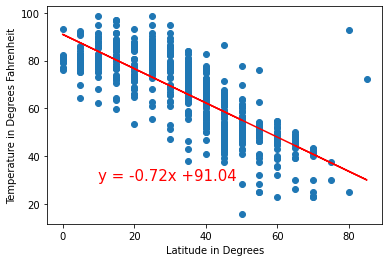

In [340]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Temperature in Degrees Fahrenheit")
plt.annotate(line_eq, (10,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("N_TempLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Temperature vs Latitude for Northern Hemisphere 

1.  The chart establishes the numerical relationship between latitude and temperature in the evaluated areas
2.  The r value of 65 yielded by the caluculations clearly indicate a definite correlation between temperature and latitude -this relationship is determined to be temperature=.72*latitude + 91 as indicated by the equation
3.  The temperatures have larger value ranges in the middle latitudes between the equator and the arctic areas

In [361]:
# Linear Regression - Temperature vs Latitude - Southern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=south_city["Latitude"]
y_val=south_city["Temperature"]

In [362]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.4031871295427308


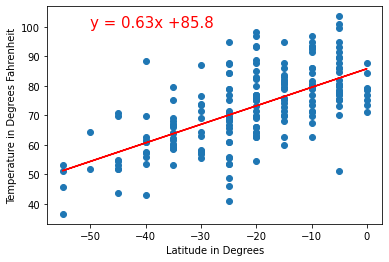

In [363]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Temperature in Degrees Fahrenheit")
plt.annotate(line_eq, (-50,100), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("S_TempLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Temperature vs Latitude for Southern Hemisphere 

1.  The chart establishes the numerical relationship between latitude and temperature in the evaluated areas
2.  The data from the southern hemisphere reflects the same observations related to temperatures closer to and further from the equator seen in the northern hemisphere data
3.  The r value calculated for the south is only 40. However, the number of readings in the southern hemispere is about 1/4 of the number from the north which provides a reasonable level of distortion.  

In [345]:
# Linear Regression - Humidity vs Latitude - Northern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=north_city["Latitude"]
y_val=north_city["Humidity"]

In [346]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.0030930891848469136


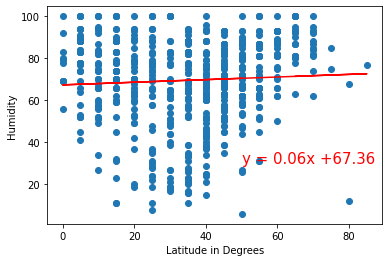

In [348]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Humidity")
plt.annotate(line_eq, (50,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("N_HumidLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Humidity vs Latitude for Northern Hemisphere 

1.  The chart attempts to establish a mathematical relationship between humidity and latitude in the northern hempisphere
2.  The calculations show no correlation between the two metrics as indicated by an extremely low r value
3.  As before, the ranges of humidity across the latitudes reflect populations of those areas

In [364]:
# Linear Regression - Humidity vs Latitude - Southern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=south_city["Latitude"]
y_val=south_city["Humidity"]

In [365]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.0002784659743172985


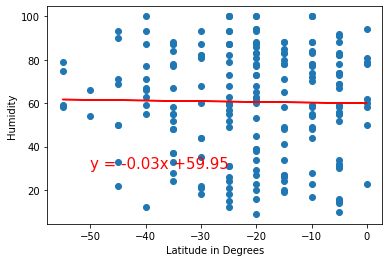

In [366]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("S_HumidLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Humidity vs Latitude for Southern Hemisphere 

1. The chart attempts to establish a mathematical relationship between humidity and latitude in the southern hempisphere
2. The results of the calculations reflect the northern data which shows no relationship between humidity and latitude.
3. As seen previously, the lower number of measurements results in an even smaller r value

In [355]:
# Linear Regression - Cloudiness vs Latitude - Northern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=north_city["Latitude"]
y_val=north_city["Cloudiness"]

In [356]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.009160574930613672


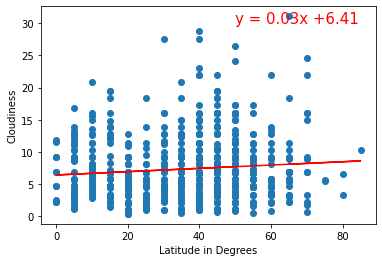

In [357]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (50,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("N_CloudLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Cloudiness vs Latitude for Northern Hemisphere 

1.  The chart and accompanying calculation attempt to determine if any mathematical relationship exists between cloudiness and latitude in the northern hemsphere
2.  The very low r value calculated by the equations indicates that there is no correlation between cloudiness and latitude.  
3.  The data also indicates that cloud levels do not vary in range across latitudes

In [367]:
# Linear Regression - Cloudiness vs Latitude - Southern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=south_city["Latitude"]
y_val=south_city["Cloudiness"]

In [368]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.05229875496880943


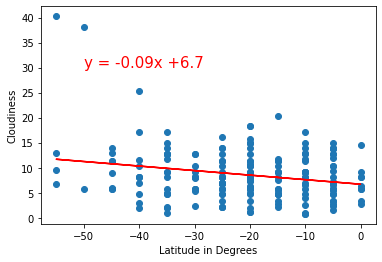

In [369]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("S_CloudLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Cloudiness vs Latitude for Southern Hemisphere 

1. The chart and accompanying calculation attempt to determine if any mathematical relationship exists between cloudiness and latitude in the southern hemsphere
2.  The very low r value indicates that, like the northern hemisphere, there is no correlation between cloudiness and latitude in the southern hemishere.  
3. An interesting observation that could likely be related to the fact that there are 75% fewer data points than in the northern areas is that the r value is almost 6 times higher for the southern data.  

In [370]:
# Linear Regression - Wind Speed vs Latitude - Northern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=north_city["Latitude"]
y_val=north_city["Wind_Speed"]

In [371]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 0.02333516382591928


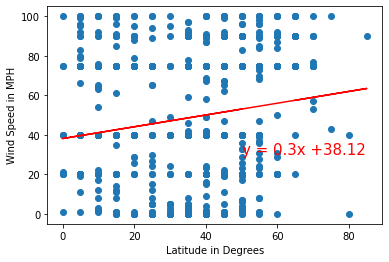

In [372]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Wind Speed in MPH")
plt.annotate(line_eq, (50,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("N_WindLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Wind Speed vs Latitude for Northern Hemisphere 

1.  The chart and accompanying calculation attempt to determine if any mathematical relationship exists between wind speed and latitude in the northern hemsphere
2.  As with the majority of the metrics, the low r value indicates that there is no correlation between wind speed and latitude 
3.  Above 60 degrees the wind speeds tend to be higher whereas the speeds are more balanced form 60 to the equator

In [373]:
# Linear Regression - Wind Speed vs Latitude - Southern Hemisphere

# Establish X and Y data for the plot using appropriate fields from the hemisphere segregated dataframe
x_val=south_city["Latitude"]
y_val=south_city["Wind_Speed"]

In [374]:
# Establish the equations and related variables for calculation of the regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)
regress_eq=x_val*slope+intercept
line_eq="y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

The r-value is: 4.934244336591154e-07


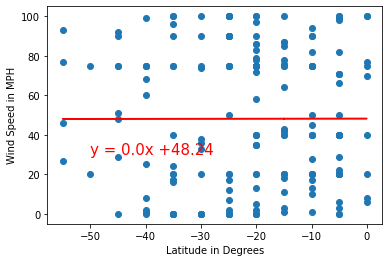

In [375]:
# Plot the chart, add labels, print the calculated r value to the terminal/console, and save to a png file in the directory of the notebook
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_eq,"r-")
plt.xlabel("Latitude in Degrees")
plt.ylabel("Wind Speed in MPH")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("S_WindLat_Regress.png", dpi=300)
plt.show()

### Observations - Linear Regression - Wind Speed vs Latitude for Southern Hemisphere 

1.  The chart and accompanying calculation attempt to determine if any mathematical relationship exists between wind speed and latitude in the southern hemsphere
2.  This analysis  has the distinction of being the only one in this study to return invalid results.  Though this can be related to multiple things the most likely cause is that the sample set is too small for the regression.  The analysis returned an r value greatly in excess of 1 at nearly 5 and the correlation equation yielded a zero slope along with an intercept of 48 . Though it is not definitive if the amount of data collected for the northern hemisphere would have failed to change the result, it is certainly unlikely as there seems to be a great deal of consistency between the hemispheres, differences in land mass notwithstanding.   